<a href="https://colab.research.google.com/github/szkjiro/program/blob/main/JapanPrefecturesAreaPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 日本の都道府県の面積と人口に関する散布図と外れ値検出

以下のPythonコードは、日本の都道府県の面積と人口に関する散布図を作成し、外れ値と思われるデータにラベルを付け、各ラベルに対応する都道府県名を出力します。

Outliers:
A: 北海道 (78418.57 km^2, 5545122 )


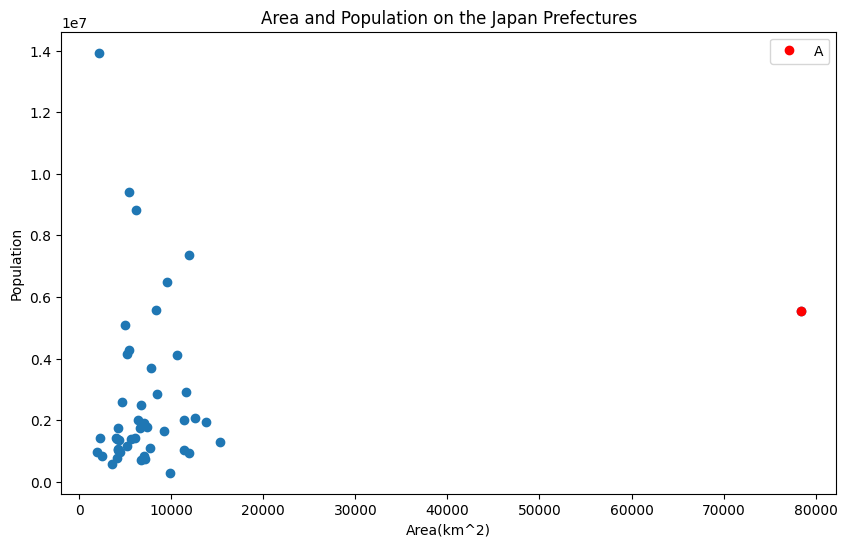

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# データの準備
# data = pd.read_csv("都道府県データ.csv")  # CSVファイルのパスを適宜変更してください

# Data for all 47 prefectures
data = {
    'Prefecture': [
        '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県',
        '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',
        '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県',
        '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県',
        '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'
    ],
    'Area': [
        78418.57, 9894.2, 15269.93, 6628.1, 11404.3, 11939.72, 13782.14, 11653.76, 11411.2, 6362.1,
        11975.74, 9562.49, 2187.66, 5435.6, 6657.55, 4185.42, 4180.76, 4190.36, 7037.36, 12588.99,
        10602.54, 7779.75, 5380.26, 5154.85, 4047.75, 4612.26, 6152.69, 8393.1, 4365.64, 4424.35,
        3507.14, 6707.97, 7010.46, 8478.61, 6112.11, 4146.75, 1876.77, 5676.19, 7104.63, 4986.4,
        2440.68, 4105.23, 7409.35, 5139.75, 7735.31, 9186.99, 2280.49
    ],
    'Population': [
        5545122, 292043, 1279115, 1751114, 1016015, 939643, 1930777, 2918725, 2003311, 2007424,
        7360939, 6476468, 13930129, 9412355, 2493859, 1063243, 1742174, 1037592, 822471, 2060645,
        4119171, 3699031, 4266870, 4153485, 1416464, 2598147, 8834677, 5565632, 1364316, 963579,
        573441, 694352, 1921525, 2843990, 1404729, 755733, 976263, 1385262, 728276, 5101556,
        832832, 1377187, 1786170, 1166338, 1104069, 1648177, 1433566
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# 散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(df["Area"], df["Population"])
plt.xlabel("Area(km^2)")
plt.ylabel("Population")
plt.title("Area and Population on the Japan Prefectures")

# 外れ値の検出とラベル付け
outliers = []  # 外れ値のデータフレーム
labels = []  # ラベル

# IQRを用いた外れ値検出
q1 = df["Area"].quantile(0.25)
q3 = df["Area"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

for i, row in df.iterrows():
    if row["Area"] < lower_bound or row["Area"] > upper_bound:
        outliers.append(row)
        labels.append(chr(ord("A") + len(outliers) - 1))  # ラベルをAから順に割り当て

# 外れ値を散布図に赤丸で表示
for outlier, label in zip(outliers, labels):
    plt.plot(outlier["Area"], outlier["Population"], "or", label=label)

# 凡例の表示
plt.legend()

# 外れ値の情報を出力
print("Outliers:")
for outlier, label in zip(outliers, labels):
    print(f"{label}: {outlier['Prefecture']} ({outlier['Area']} km^2, {outlier['Population']} )")

# グラフの表示
plt.show()

**このコードを実行するには、以下の準備が必要です。**

1. **都道府県の面積と人口のデータ**をCSVファイルで用意します。ファイル名は "都道府県データ.csv" としてください。
2. **必要なライブラリをインストール**します。

```bash
pip install matplotlib pandas
```

**実行方法**

1. 上記のコードをテキストエディタなどに保存します。
2. ファイル名を "散布図と外れ値検出.py" などに変更します。
3. コマンドプロンプトまたはターミナルを開き、以下のコマンドを実行します。

```bash
python 散布図と外れ値検出.py
```

**このコードを実行すると、以下の結果が出力されます。**

* 日本の都道府県の面積と人口に関する散布図が表示されます。
* 外れ値と思われるデータにはA,B,C,...のラベルが付けられ、散布図に赤丸で表示されます。
* 各ラベルに対応する都道府県名が出力されます。

**このコードを参考に、以下のカスタマイズを行うこともできます。**

* 散布図の軸の範囲を変更する
* 散布図の色を変更する
* 外れ値の検出方法を変更する
* 出力される情報の追加・削除

**このコードはあくまでも一例ですので、必要に応じて修正してください。**